# Stat 109 Spring 2019 Project

This notebook is processing and joining data from different sources and formats into a single csv. 

In [1]:
import numpy as np
import pandas as pd

# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
%matplotlib inline

import re

In [2]:
DATA_DIR = "../data/"

## Processing the CDC 500 City data set

First the general columns are extracted, then the measures of interested are joined by 'Year', 'StateAbbr', and 'CityName'

In [3]:
df_cdc_500 = pd.read_csv(DATA_DIR+"500_Cities__Local_Data_for_Better_Health__2018_release.csv")

In [4]:
df_cdc_500.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'CityName', 'GeographicLevel',
       'DataSource', 'Category', 'UniqueID', 'Measure', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value_Type', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'PopulationCount',
       'GeoLocation', 'CategoryID', 'MeasureId', 'CityFIPS', 'TractFIPS',
       'Short_Question_Text'],
      dtype='object')

These follow are general columns common regardless of the Measure.

In [5]:
cols = ['Year', 'StateAbbr', 'StateDesc', 'CityName', 
       'Data_Value', 'PopulationCount',
       'GeoLocation']

These are helper methods used to split the GeoLocation into separate Latitude, Longitude columns.


In [6]:

nums = re.compile(r"[+-]?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?")

def geo_to_lat_long(s):
    lat_str, lng_str = re.findall(nums, s)
    return (float(lat_str), float(lng_str))


First get all the rows for Asthma percentage. This will be our response (Y) variable.

In [7]:
df = df_cdc_500[ (df_cdc_500['Year'] == 2016) & (df_cdc_500['MeasureId'] == "CASTHMA") & (df_cdc_500['GeographicLevel'] == "City") & (df_cdc_500['DataValueTypeID'] == "AgeAdjPrv") ][cols]
df['Lat'] = df['GeoLocation'].apply(lambda s: geo_to_lat_long(s)[0])
df['Lng'] = df['GeoLocation'].apply(lambda s: geo_to_lat_long(s)[1])
df.drop(['GeoLocation'], axis=1, inplace=True)
df.rename(columns={"Data_Value": "AsthmaPct"}, inplace=True)
df.shape

(500, 8)

In [8]:
df.head()

,Year,StateAbbr,StateDesc,CityName,AsthmaPct,PopulationCount,Lat,Lng
659,2016,AL,Alabama,Birmingham,10.5,212237,33.527566,-86.798817
3037,2016,AL,Alabama,Hoover,7.9,81619,33.376760,-86.805194
4112,2016,AL,Alabama,Huntsville,9.5,180105,34.698969,-86.638704
6031,2016,AL,Alabama,Mobile,9.9,195111,30.677625,-88.118448
8160,2016,AL,Alabama,Montgomery,10.3,205764,32.347265,-86.267706


Some helper functions

In [9]:

def merge_data_value(df_src, df_target, measure_id, col_name):
    """Helper function for merging in a specific mesaure into a dataframe.
    # Arguments
        df_src: The data frame containing the measure of interest.
        df_target: The data frame that the measure will be merged into.
        measure_id: name of the measure_id to be found in  df_src.
        col_name: The name of the column to be created in df_target.
    # Returns
        A DataFrame with the measure as a new column.
    """
    df_new = df_src[ (df_src["MeasureId"] == measure_id) & (df_src['GeographicLevel'] == "City") & (df_src['DataValueTypeID'] == "AgeAdjPrv") ]
    df_target = pd.merge(df_target, df_new[['Year','StateAbbr','CityName','Data_Value']], on=['Year','StateAbbr','CityName'])
    df_target.rename(columns={"Data_Value": col_name}, inplace=True)
    return df_target



In [10]:
df = merge_data_value(df_cdc_500, df, "CSMOKING", "SmokingPct")
df = merge_data_value(df_cdc_500, df, "ACCESS2", "Access")
df = merge_data_value(df_cdc_500, df, "OBESITY", "Obesity")
df = merge_data_value(df_cdc_500, df, "LPA", "PhysicalAct")
df.head()


,Year,StateAbbr,StateDesc,CityName,AsthmaPct,PopulationCount,Lat,Lng,SmokingPct,Access,Obesity,PhysicalAct
0,2016,AL,Alabama,Birmingham,10.5,212237,33.527566,-86.798817,22.6,19.5,42.6,35.8
1,2016,AL,Alabama,Hoover,7.9,81619,33.376760,-86.805194,13.9,10.6,28.9,20.2
2,2016,AL,Alabama,Huntsville,9.5,180105,34.698969,-86.638704,18.9,15.4,33.3,25.9
3,2016,AL,Alabama,Mobile,9.9,195111,30.677625,-88.118448,20.7,17.4,39.7,29.3
4,2016,AL,Alabama,Montgomery,10.3,205764,32.347265,-86.267706,21.1,18.0,36.9,30.0


In [11]:
# Checkpoint the results 
df.to_csv(DATA_DIR+"500_city_asthma.csv", index=False)

### Visualize some of the data

Text(0, 0.5, 'SmokingPct')

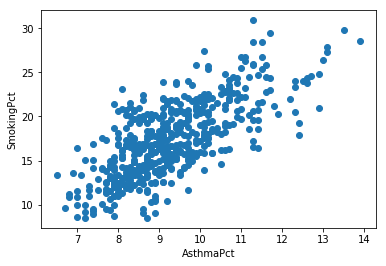

In [12]:
plt.scatter(df['AsthmaPct'], df['SmokingPct'])
plt.xlabel('AsthmaPct')
plt.ylabel('SmokingPct')

Text(0, 0.5, 'PopulationCount')

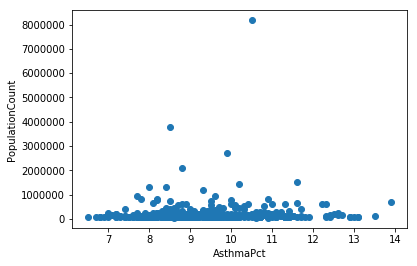

In [13]:
plt.scatter(df['AsthmaPct'], df['PopulationCount'])
plt.xlabel('AsthmaPct')
plt.ylabel('PopulationCount')

Text(0, 0.5, 'Obesity')

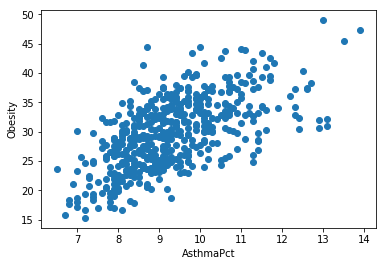

In [14]:
plt.scatter(df['AsthmaPct'], df['Obesity'])
plt.xlabel('AsthmaPct')
plt.ylabel('Obesity')

Text(0, 0.5, 'PhysicalAct')

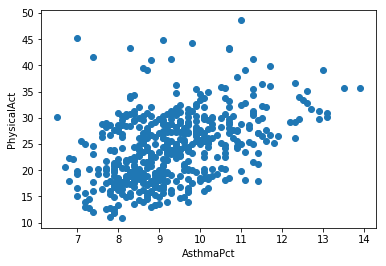

In [15]:
plt.scatter(df['AsthmaPct'], df['PhysicalAct'])
plt.xlabel('AsthmaPct')
plt.ylabel('PhysicalAct')

Text(0, 0.5, 'Health Care Access')

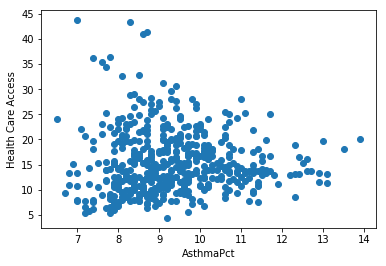

In [16]:
plt.scatter(df['AsthmaPct'], df['Access'])
plt.xlabel('AsthmaPct')
plt.ylabel('Health Care Access')

## Air Quality

original list of columns: ['CBSA Code', 'CBSA', 'CO 2nd Max 1-hr', 'CO 2nd Max 8-hr',
       'NO2 98th Percentile 1-hr', 'NO2 Mean 1-hr', 'Ozone 2nd Max 1-hr',
       'Ozone 4th Max 8-hr', 'SO2 99th Percentile 1-hr', 'SO2 2nd Max 24-hr',
       'SO2 Mean 1-hr', 'PM2.5 98th Percentile 24-hr',
       'PM2.5 Weighted Mean 24-hr', 'PM10 2nd Max 24-hr', 'PM10 Mean 24-hr',
       'Lead Max 3-Mo Avg']
       
We will be investigating a subset of these columns.

In [17]:
!head ../data/2016_air_quality.csv

"CBSA Code","CBSA","CO 2nd Max 1-hr","CO 2nd Max 8-hr","NO2 98th Percentile 1-hr","NO2 Mean 1-hr","Ozone 2nd Max 1-hr","Ozone 4th Max 8-hr","SO2 99th Percentile 1-hr","SO2 2nd Max 24-hr","SO2 Mean 1-hr","PM2.5 98th Percentile 24-hr","PM2.5 Weighted Mean 24-hr","PM10 2nd Max 24-hr","PM10 Mean 24-hr","Lead Max 3-Mo Avg"
"10100","Aberdeen, SD",".",".",".",".",".",".",".",".",".","14","6","65","20","."
"10300","Adrian, MI",".",".",".",".","0.08","0.069",".",".",".","15","7.5",".",".","."
"10420","Akron, OH","1.4","1.1",".",".","0.09","0.061","10","3","0","22","10.2",".",".","."
"10500","Albany, GA",".",".",".",".",".",".",".",".",".","28","8.7",".",".","."
"10580","Albany-Schenectady-Troy, NY","1.4","0.8",".",".","0.09","0.068","4","2","0","18","6.3",".",".","."
"10740","Albuquerque, NM","2.2","1.9","44","10","0.08","0.067","6","2","1","19","7.6","205","35","0"
"10900","Allentown-Bethlehem-Easton, PA-NJ",".",".","48","11","0.09","0.075","19","5","1","25","10.5","31","12","0.11"
"11020","Al

In [18]:
df_2016_air_raw = pd.read_csv(DATA_DIR+"2016_air_quality.csv")

# Columns of interest
aq_cols = [ 
        'CBSA', 
        'CO 2nd Max 8-hr', 
        'NO2 Mean 1-hr',
        'Ozone 4th Max 8-hr',
        'SO2 Mean 1-hr',
        'PM2.5 Weighted Mean 24-hr',
        'PM10 Mean 24-hr',
        'Lead Max 3-Mo Avg'
    ]

df_2016_air_raw = df_2016_air_raw[aq_cols]
df_2016_air_raw.replace("^\.$", np.nan, regex=True, inplace=True)

# Explicity set the column type.
aq_col_types = {
        'CBSA': str,
        'CO 2nd Max 8-hr': pd.np.float64, 
        'NO2 Mean 1-hr': pd.np.float64,
        'Ozone 4th Max 8-hr': pd.np.float64,
        'SO2 Mean 1-hr': pd.np.float64,
        'PM2.5 Weighted Mean 24-hr': pd.np.float64,
        'PM10 Mean 24-hr': pd.np.float64,
        'Lead Max 3-Mo Avg': pd.np.float64}

df_2016_air_raw = df_2016_air_raw.astype(aq_col_types)

df_2016_air_raw.head()

,CBSA,CO 2nd Max 8-hr,NO2 Mean 1-hr,Ozone 4th Max 8-hr,SO2 Mean 1-hr,PM2.5 Weighted Mean 24-hr,PM10 Mean 24-hr,Lead Max 3-Mo Avg
0,"Aberdeen, SD",NaN,NaN,NaN,NaN,6.0,20.0,NaN
1,"Adrian, MI",NaN,NaN,0.069,NaN,7.5,NaN,NaN
2,"Akron, OH",1.1,NaN,0.061,0.0,10.2,NaN,NaN
3,"Albany, GA",NaN,NaN,NaN,NaN,8.7,NaN,NaN
4,"Albany-Schenectady-Troy, NY",0.8,NaN,0.068,0.0,6.3,NaN,NaN


Split city and state from the CBSA column to make it possible to join with other data frames. Note, dropping Lead column as it has many empty rows.

In [19]:
df_2016_air_raw['CityName'] = df_2016_air_raw['CBSA'].apply(lambda s: s.split(',')[0].strip())
df_2016_air_raw['StateAbbr'] = df_2016_air_raw['CBSA'].apply(lambda s: s.split(',')[1].strip())
df_2016_air_raw.drop(['CBSA'], axis=1, inplace=True)
df_2016_air_raw.drop(['Lead Max 3-Mo Avg'], axis=1, inplace=True)
df_2016_air_raw = df_2016_air_raw.reindex(columns = df_2016_air_raw.columns)


In [20]:
# Clean column name. Replace special chars with _  
df_2016_air_raw.columns = [re.sub(" |-|\.", "", col) for col in df_2016_air_raw.columns]

In [21]:
df_2016_air_raw.head()


,CO2ndMax8hr,NO2Mean1hr,Ozone4thMax8hr,SO2Mean1hr,PM25WeightedMean24hr,PM10Mean24hr,CityName,StateAbbr
0,NaN,NaN,NaN,NaN,6.0,20.0,Aberdeen,SD
1,NaN,NaN,0.069,NaN,7.5,NaN,Adrian,MI
2,1.1,NaN,0.061,0.0,10.2,NaN,Akron,OH
3,NaN,NaN,NaN,NaN,8.7,NaN,Albany,GA
4,0.8,NaN,0.068,0.0,6.3,NaN,Albany-Schenectady-Troy,NY


Some of the rows represent metropolitan regions that contain multiple cities that may also span adjoining states. These are '-' delimited in either the city or state part. Those rows will be duplicated for each city to make a join easier. This is not the most efficient way to do it and may take some minutes.

In [22]:
df_exp = pd.DataFrame(columns=df_2016_air_raw.columns)
for i in range(df_2016_air_raw.shape[0]):
    cities = df_2016_air_raw.loc[i, 'CityName'].split('-')
    states = df_2016_air_raw.loc[i, 'StateAbbr'].split('-')
    if len(cities) > 1 or len(states) > 1:
        for state in states:
            for city in cities:
                tmp = df_2016_air_raw.iloc[i]
                tmp['StateAbbr'] = state
                tmp['CityName'] = city
                df_exp = df_exp.append(tmp)


/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [23]:
print("Air Quality Data:: Original {}, Expanded {}".format(df_2016_air_raw.shape, df_exp.shape))

df_2016_air_merged = df_2016_air_raw.append(df_exp)
df = pd.merge(df, df_2016_air_merged, how='left', on=['StateAbbr','CityName'])
print("Joined Data:: {}".format(df.shape))


Air Quality Data:: Original (486, 8), Expanded (482, 8)
Joined Data:: (500, 18)


In [24]:
df.head()

,Year,StateAbbr,StateDesc,CityName,AsthmaPct,PopulationCount,Lat,Lng,SmokingPct,Access,Obesity,PhysicalAct,CO2ndMax8hr,NO2Mean1hr,Ozone4thMax8hr,SO2Mean1hr,PM25WeightedMean24hr,PM10Mean24hr
0,2016,AL,Alabama,Birmingham,10.5,212237,33.527566,-86.798817,22.6,19.5,42.6,35.8,1.5,14.0,0.073,2.0,10.8,24.0
1,2016,AL,Alabama,Hoover,7.9,81619,33.376760,-86.805194,13.9,10.6,28.9,20.2,1.5,14.0,0.073,2.0,10.8,24.0
2,2016,AL,Alabama,Huntsville,9.5,180105,34.698969,-86.638704,18.9,15.4,33.3,25.9,NaN,NaN,0.066,NaN,7.8,20.0
3,2016,AL,Alabama,Mobile,9.9,195111,30.677625,-88.118448,20.7,17.4,39.7,29.3,NaN,NaN,0.063,1.0,8.1,NaN
4,2016,AL,Alabama,Montgomery,10.3,205764,32.347265,-86.267706,21.1,18.0,36.9,30.0,NaN,NaN,0.063,NaN,8.7,NaN


In [25]:
# Checkpoint
df.to_csv(DATA_DIR+"500_city_asthma_with_aq.csv", index=False)

## Housing

This section is to primarily pull the renter-occupied percentage data. There are additional interesting housing characteristic that could also be looked at such as the age of the structure.

In [26]:
# Skip first row since it consists of the column code and instead we are using the second row has the column header
df_housing_raw = pd.read_csv(DATA_DIR+"ACSDP1Y2016.DP04_2019-04-12T225224/ACSDP1Y2016.DP04_data_with_overlays_2019-04-12T225216.csv", skiprows=[0])
df_housing_raw.shape

(605, 574)

Define the columns we are interested in and extract them.

In [27]:

cols_of_single = [
    "Geographic Area Name",
    "Percent!!HOUSING TENURE!!Occupied housing units!!Renter-occupied"
]

cols_of_multi = [
#    "Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built",
#    "Percent Margin of Error!!YEAR STRUCTURE BUILT!!Total housing units!!Built",
#    "Percent!!GROSS RENT!!Occupied units paying rent!!",
#    "Percent Margin of Error!!GROSS RENT!!Occupied units paying rent!!"
    ]

cols_of_interest = cols_of_single + cols_of_multi

In [28]:
# only extract a subset of columns

col_index = []
for i, col in enumerate(df_housing_raw.columns):
    for ci in cols_of_interest:
        if col.startswith(ci):
            col_index.append(i)
            break;
            
df_housing = df_housing_raw.iloc[:,col_index]
new_col_names = []
for col in df_housing.columns:
    clean_col_name = col\
        .replace("Percent!!HOUSING TENURE!!Occupied housing units!!Renter-occupied", "RenterOccupiedPct") \
        .replace("Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built", "PercentBuilt") \
        .replace("Percent Margin of Error!!YEAR STRUCTURE BUILT!!Total housing units!!Built", "PercentMoEBuilt") \
        .replace("Percent!!GROSS RENT!!Occupied units paying rent!!", "PercentRent") \
        .replace("Percent Margin of Error!!GROSS RENT!!Occupied units paying rent!!", "PercentMoERent") \
        .replace(" ", "").replace("$", "").replace(",", "")
    new_col_names.append(clean_col_name)


df_housing.columns = new_col_names
df_housing.head()

,GeographicAreaName,RenterOccupiedPct
0,"Birmingham city, Alabama",54.1
1,"Dothan city, Alabama",42.1
2,"Hoover city, Alabama",32.1
3,"Huntsville city, Alabama",43.3
4,"Mobile city, Alabama",46.3


Split the City and State to make it possible to join with the main data frame.

In [29]:
df_housing.replace("city", "", regex=True, inplace=True)
df_housing['CityName'] = df_housing['GeographicAreaName'].apply(lambda s: s.split(',')[0].strip())
df_housing['StateDesc'] = df_housing['GeographicAreaName'].apply(lambda s: s.split(',')[1].strip())
df_housing.drop(['GeographicAreaName'], axis=1, inplace=True)
df_housing = df_housing.reindex(columns = df_housing.columns)


/anaconda3/envs/tf/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This

In [30]:
df_housing.shape

(605, 3)

In [31]:
df = pd.merge(df, df_housing, how='left', on=['StateDesc','CityName'])
print("Joined Data:: {}".format(df.shape))

Joined Data:: (500, 19)


Text(0, 0.5, 'PercentRenterOccupied')

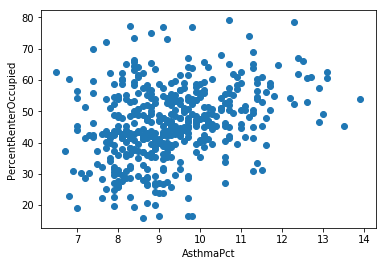

In [32]:
plt.scatter(df['AsthmaPct'], df['RenterOccupiedPct'])
plt.xlabel('AsthmaPct')
plt.ylabel('PercentRenterOccupied')

In [33]:
df.head()


,Year,StateAbbr,StateDesc,CityName,AsthmaPct,PopulationCount,Lat,Lng,SmokingPct,Access,Obesity,PhysicalAct,CO2ndMax8hr,NO2Mean1hr,Ozone4thMax8hr,SO2Mean1hr,PM25WeightedMean24hr,PM10Mean24hr,RenterOccupiedPct
0,2016,AL,Alabama,Birmingham,10.5,212237,33.527566,-86.798817,22.6,19.5,42.6,35.8,1.5,14.0,0.073,2.0,10.8,24.0,54.1
1,2016,AL,Alabama,Hoover,7.9,81619,33.376760,-86.805194,13.9,10.6,28.9,20.2,1.5,14.0,0.073,2.0,10.8,24.0,32.1
2,2016,AL,Alabama,Huntsville,9.5,180105,34.698969,-86.638704,18.9,15.4,33.3,25.9,NaN,NaN,0.066,NaN,7.8,20.0,43.3
3,2016,AL,Alabama,Mobile,9.9,195111,30.677625,-88.118448,20.7,17.4,39.7,29.3,NaN,NaN,0.063,1.0,8.1,NaN,46.3
4,2016,AL,Alabama,Montgomery,10.3,205764,32.347265,-86.267706,21.1,18.0,36.9,30.0,NaN,NaN,0.063,NaN,8.7,NaN,44.3


In [34]:
# Checkpoint
df.to_csv(DATA_DIR+"500_city_asthma_with_aq_housing.csv", index=False)

## Census

In [35]:
# Skip first row since it consists of the column code and instead we are using the second row has the column header
df_census = pd.read_csv(DATA_DIR+"2016_census.csv", encoding="ISO-8859-1", skiprows=[0])
df_census.shape

(29575, 7)

In [36]:
df_census.columns

Index(['Geography', 'Unnamed: 1',
       'Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate',
       'Percent; INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS) - With cash public assistance income',
       'Percent; INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS) - With Food Stamp/SNAP benefits in the past 12 months',
       'Percent; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - No health insurance coverage',
       'Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people'],
      dtype='object')

In [37]:
new_column_names = {
    'Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate': 'UnempRatePct',
    'Percent; INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS) - With cash public assistance income': 'CashPublicAssistPct',
    'Percent; INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS) - With Food Stamp/SNAP benefits in the past 12 months': 'SNAPPct',
    'Percent; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - No health insurance coverage': "NoHealthInsCovPct",
    'Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people': 'BelowPovLevelPct'
}

df_census.rename(index=str, inplace=True, columns=new_column_names)

Clean up the data

In [38]:
# Remove the entry for 'United States' since we want city level stats.
df_census = df_census[ df_census['Geography'] != 'United States']

# Remove the spurious extra labels such as city, town, and CDP.
df_census.replace("city", "", regex=True, inplace=True)
df_census.replace("town", "", regex=True, inplace=True)

# Ignoring CDP (census-designated place label, since there are duplicates with cities of the same name.
#df_census.replace("CDP", "", regex=True, inplace=True)

# Split City/State into separate columns
df_census['CityName'] = df_census['Geography'].apply(lambda s: s.split(',')[0].strip())
df_census['StateDesc'] = df_census['Geography'].apply(lambda s: s.split(',')[1].strip())
df_census.drop(['Geography'], axis=1, inplace=True)
df_census.drop(['Unnamed: 1'], axis=1, inplace=True)

df_census = df_census.reindex(columns = df_census.columns)

In [39]:
df_census


,UnempRatePct,CashPublicAssistPct,SNAPPct,NoHealthInsCovPct,BelowPovLevelPct,CityName,StateDesc
1,0,0,39.7,34.4,27.2,Abanda CDP,Alabama
2,8.4,1.9,20.4,7.6,24.6,Abbeville,Alabama
3,7.2,2.6,16.1,9.7,15.5,Adamsville,Alabama
4,13.9,0.9,19.4,14.8,29.3,Addison,Alabama
5,12.9,1.9,36.4,24.2,43.7,Akron,Alabama
6,4.5,1.7,8.3,11.3,10.2,Alabaster,Alabama
7,5.8,1.9,22.1,20.8,28.3,Albertville,Alabama
8,11.9,1.4,25.2,12.9,33.3,Alexander City,Alabama
9,9.1,3.1,11,10.1,9.1,Alexandria CDP,Alabama
10,14.4,3.5,38.4,21.7,40.9,Aliceville,Alabama


In [40]:
print("Joined Data before:: {}".format(df.shape))
df = pd.merge(df, df_census, how='left', on=['StateDesc','CityName'])
print("Joined Data after:: {}".format(df.shape))

Joined Data before:: (500, 19)
Joined Data after:: (500, 24)


In [41]:
df.head()

,Year,StateAbbr,StateDesc,CityName,AsthmaPct,PopulationCount,Lat,Lng,SmokingPct,Access,Obesity,PhysicalAct,CO2ndMax8hr,NO2Mean1hr,Ozone4thMax8hr,SO2Mean1hr,PM25WeightedMean24hr,PM10Mean24hr,RenterOccupiedPct,UnempRatePct,CashPublicAssistPct,SNAPPct,NoHealthInsCovPct,BelowPovLevelPct
0,2016,AL,Alabama,Birmingham,10.5,212237,33.527566,-86.798817,22.6,19.5,42.6,35.8,1.5,14.0,0.073,2.0,10.8,24.0,54.1,11.8,2.7,25.2,14.9,29.4
1,2016,AL,Alabama,Hoover,7.9,81619,33.376760,-86.805194,13.9,10.6,28.9,20.2,1.5,14.0,0.073,2.0,10.8,24.0,32.1,4.1,0.3,3.6,6.3,6.1
2,2016,AL,Alabama,Huntsville,9.5,180105,34.698969,-86.638704,18.9,15.4,33.3,25.9,NaN,NaN,0.066,NaN,7.8,20.0,43.3,8.1,2.4,13.1,12.4,17.5
3,2016,AL,Alabama,Mobile,9.9,195111,30.677625,-88.118448,20.7,17.4,39.7,29.3,NaN,NaN,0.063,1.0,8.1,NaN,46.3,9.4,1.7,20.5,13.5,23.1
4,2016,AL,Alabama,Montgomery,10.3,205764,32.347265,-86.267706,21.1,18.0,36.9,30.0,NaN,NaN,0.063,NaN,8.7,NaN,44.3,8.8,2,20.9,12.8,22.6


In [42]:
# Checkpoint
df.to_csv(DATA_DIR+"500_city_asthma_with_aq_housing_census.csv", index=False)

### Let's assess the state of NaNs.

In [43]:
df.shape[0] - df.isna().sum()

Year                    500
StateAbbr               500
StateDesc               500
CityName                500
AsthmaPct               500
PopulationCount         500
Lat                     500
Lng                     500
SmokingPct              500
Access                  500
Obesity                 500
PhysicalAct             500
CO2ndMax8hr             169
NO2Mean1hr              162
Ozone4thMax8hr          265
SO2Mean1hr              174
PM25WeightedMean24hr    248
PM10Mean24hr            192
RenterOccupiedPct       460
UnempRatePct            464
CashPublicAssistPct     464
SNAPPct                 464
NoHealthInsCovPct       464
BelowPovLevelPct        464
dtype: int64

In [44]:
# Number of rows with at least 15 columns populated
((df.shape[1] - df.isna().sum(axis=1)) > 15).sum()

479

In [45]:
df.shape

(500, 24)

In [51]:
df.head()

,Year,StateAbbr,StateDesc,CityName,AsthmaPct,PopulationCount,Lat,Lng,SmokingPct,Access,Obesity,PhysicalAct,CO2ndMax8hr,NO2Mean1hr,Ozone4thMax8hr,SO2Mean1hr,PM25WeightedMean24hr,PM10Mean24hr,RenterOccupiedPct,UnempRatePct,CashPublicAssistPct,SNAPPct,NoHealthInsCovPct,BelowPovLevelPct
0,2016,AL,Alabama,Birmingham,10.5,212237,33.527566,-86.798817,22.6,19.5,42.6,35.8,1.5,14.0,0.073,2.0,10.8,24.0,54.1,11.8,2.7,25.2,14.9,29.4
1,2016,AL,Alabama,Hoover,7.9,81619,33.376760,-86.805194,13.9,10.6,28.9,20.2,1.5,14.0,0.073,2.0,10.8,24.0,32.1,4.1,0.3,3.6,6.3,6.1
2,2016,AL,Alabama,Huntsville,9.5,180105,34.698969,-86.638704,18.9,15.4,33.3,25.9,NaN,NaN,0.066,NaN,7.8,20.0,43.3,8.1,2.4,13.1,12.4,17.5
3,2016,AL,Alabama,Mobile,9.9,195111,30.677625,-88.118448,20.7,17.4,39.7,29.3,NaN,NaN,0.063,1.0,8.1,NaN,46.3,9.4,1.7,20.5,13.5,23.1
4,2016,AL,Alabama,Montgomery,10.3,205764,32.347265,-86.267706,21.1,18.0,36.9,30.0,NaN,NaN,0.063,NaN,8.7,NaN,44.3,8.8,2,20.9,12.8,22.6


In [48]:
df.describe()

,Year,AsthmaPct,PopulationCount,Lat,Lng,SmokingPct,Access,Obesity,PhysicalAct,CO2ndMax8hr,NO2Mean1hr,Ozone4thMax8hr,SO2Mean1hr,PM25WeightedMean24hr,PM10Mean24hr,RenterOccupiedPct
count,500.0,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,169.000000,162.000000,265.000000,174.000000,248.000000,192.000000,460.000000
mean,2016.0,9.289200,2.060416e+05,36.970325,-97.988528,17.394000,15.528800,29.785600,24.33840,1.485207,12.987654,0.070004,0.850575,8.644758,22.973958,46.041739
std,0.0,1.270083,4.574810e+05,5.259107,17.478927,4.290723,6.210797,6.065305,6.59031,0.800420,6.693826,0.010209,0.880472,2.149280,12.092330,11.753692
min,2016.0,6.500000,4.241700e+04,21.458804,-157.973297,8.500000,4.400000,15.300000,10.90000,0.200000,1.000000,0.044000,0.000000,3.900000,7.000000,15.900000
25%,2016.0,8.400000,8.159000e+04,33.675199,-117.390113,14.100000,11.100000,25.300000,19.07500,0.900000,8.000000,0.064000,0.000000,7.475000,16.000000,39.575000
50%,2016.0,9.100000,1.061060e+05,37.149690,-95.312924,16.900000,14.200000,29.800000,24.25000,1.400000,12.000000,0.069000,1.000000,8.400000,19.500000,45.400000
75%,2016.0,10.025000,1.811278e+05,41.100725,-82.732076,20.500000,18.900000,33.900000,28.80000,1.800000,16.000000,0.075000,1.000000,9.600000,27.000000,54.000000
max,2016.0,13.900000,8.175133e+06,61.149869,-70.275254,30.900000,43.700000,49.000000,48.60000,5.700000,31.000000,0.116000,4.000000,16.200000,83.000000,79.100000
